# HW Problem Set 3 Plotting

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# %matplotlib ipympl

In [5]:
def f_1(z):
    return np.sqrt(z**2 - 1)

def f_2(z):
    return np.sqrt(z - 1)*np.sqrt(z + 1)

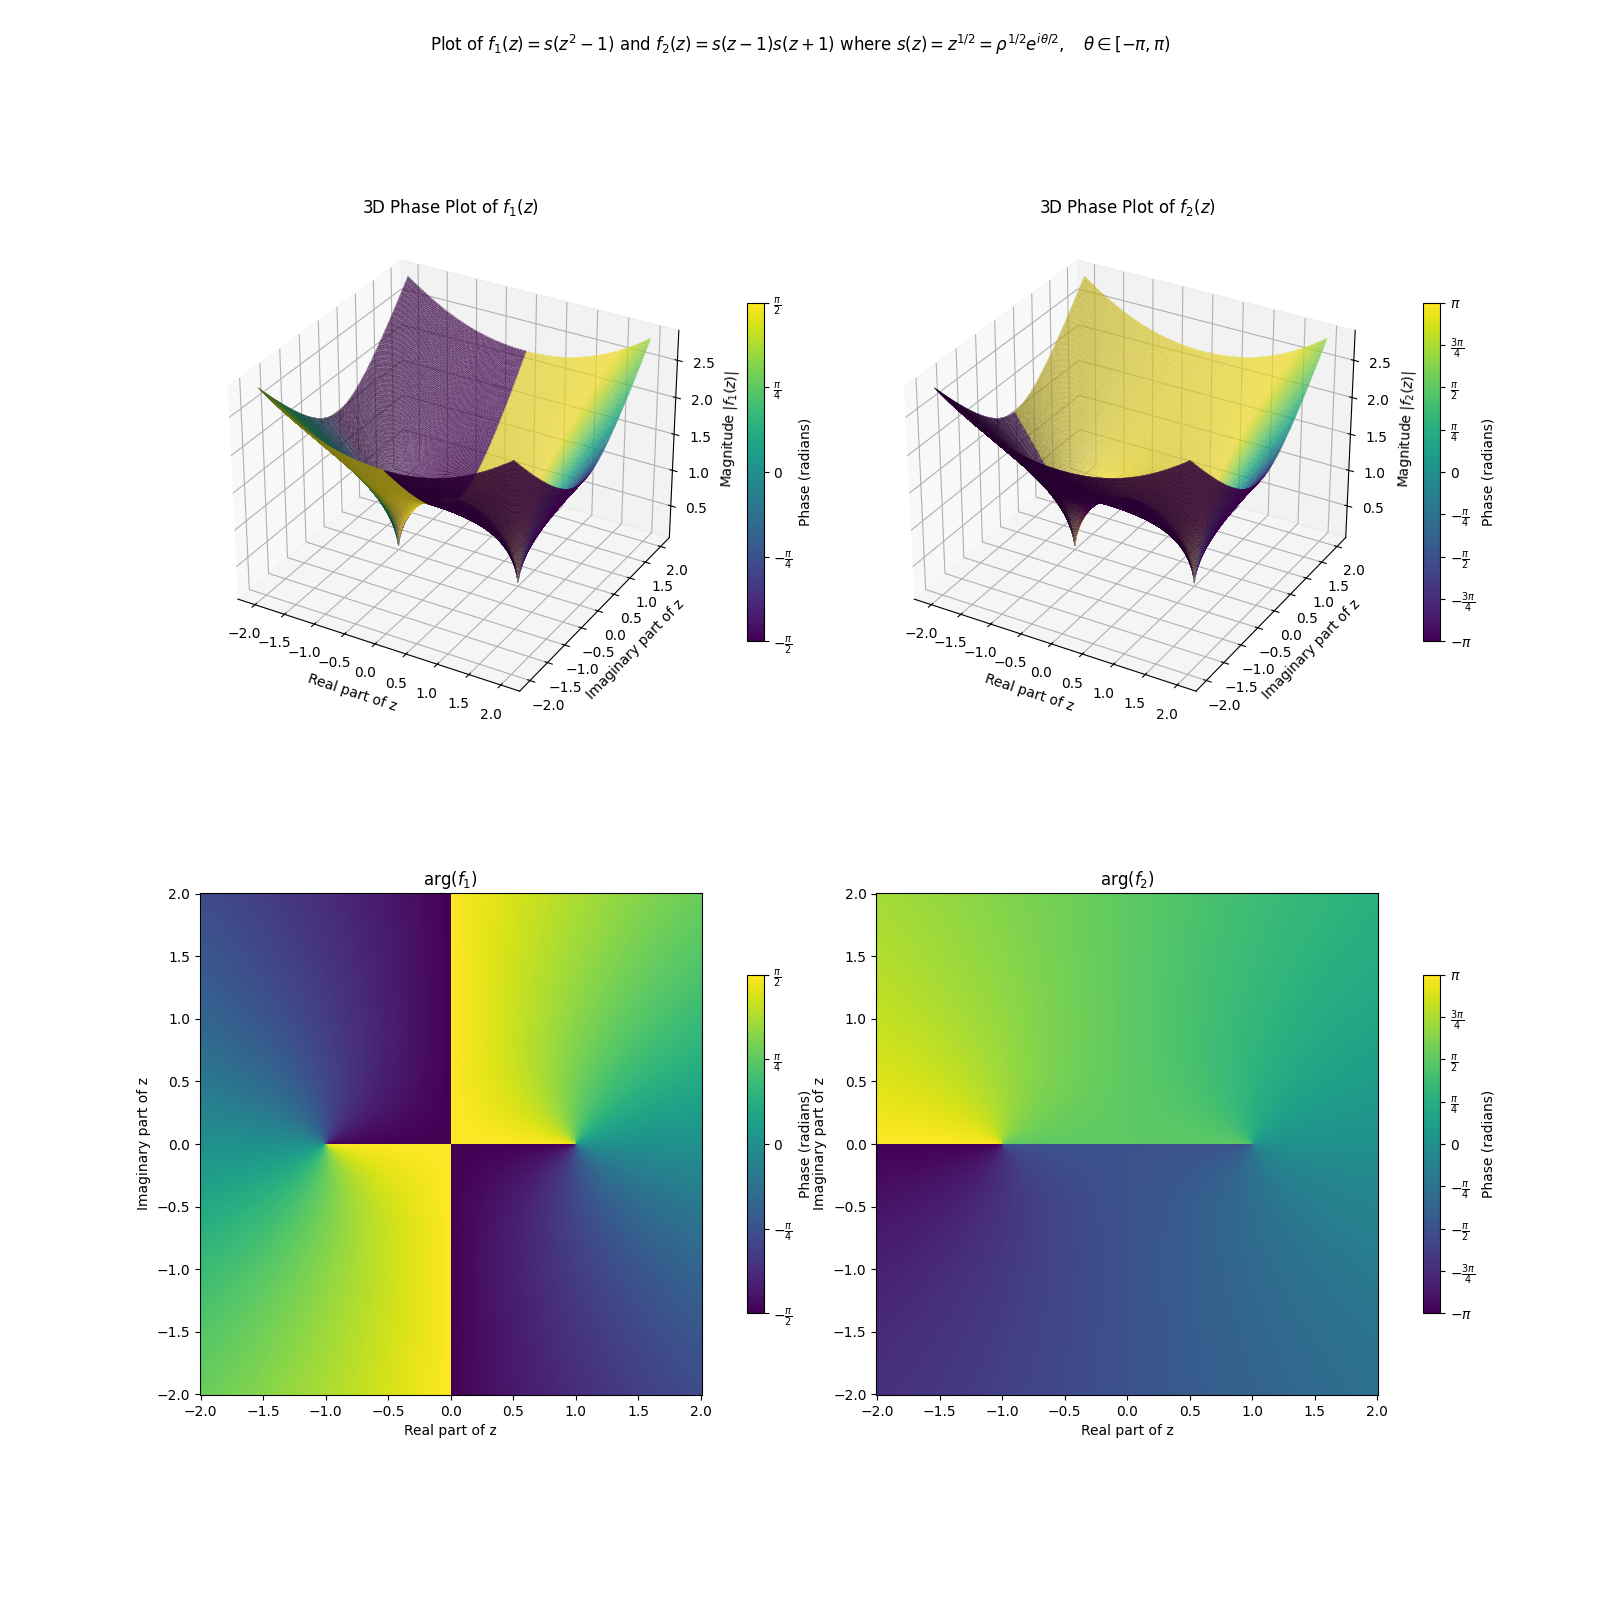

In [16]:
# cmap = plt.cm.twilight_r
cmap = plt.cm.viridis
# cmap = plt.cm.hsv
res = 400

# Plotting the 3D surface with magnitude and phase
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

cbar_ticks_range_1 = np.arange(
    -np.pi/2,
    3*np.pi/4,
    np.pi/4
)
cbar_ticks_range_2 = np.arange(
    -np.pi,
    5*np.pi/4,
    np.pi/4
)
cbar_labels_range_1 = [
    r"$-\frac{\pi}{2}$",
    r"$-\frac{\pi}{4}$",
    r"$0$",
    r"$\frac{\pi}{4}$",
    r"$\frac{\pi}{2}$",
]
cbar_labels_range_2 = [
    r"$-\pi$",
    r"$-\frac{3\pi}{4}$",
    r"$-\frac{\pi}{2}$",
    r"$-\frac{\pi}{4}$",
    r"$0$",
    r"$\frac{\pi}{4}$",
    r"$\frac{\pi}{2}$",
    r"$\frac{3\pi}{4}$",
    r"$\pi$"
]

for axes, func, cbar_labels in zip([(ax1, ax3), (ax2, ax4)], [f_1, f_2], [(cbar_ticks_range_1, cbar_labels_range_1), (cbar_ticks_range_2, cbar_labels_range_2)]):


    # Create a meshgrid of complex numbers in the complex plane
    x = np.linspace(-2, 2, res)  # Real part
    y = np.linspace(-2, 2, res)  # Imaginary part
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y  # Complex plane

    # Compute the function values on the grid
    W = func(Z)

    # Magnitude (for height) and phase (for color)
    magnitude = np.abs(W)
    phase = np.angle(W)

    # Plot the surface using magnitude as the z-axis
    surf = axes[0].plot_surface(X, Y, magnitude, facecolors=cmap(phase), rstride=1, cstride=1, linewidth=0, antialiased=False, alpha=.185)

    norm = plt.Normalize(phase.min(), phase.max())  # Normalize the phase values
    mappable = plt.cm.ScalarMappable(cmap=cmap)#, norm=norm)  # Create mappable with norm
    mappable.set_array(phase)  # Set the phase array

    # Set axis labels
    axes[0].set_xlabel('Real part of z')
    axes[0].set_ylabel('Imaginary part of z')
    axes[0].set_zlabel(rf'Magnitude $|{func.__name__}(z)|$')

    axes[0].set_title(rf'3D Phase Plot of ${func.__name__}(z)$')
    cbar = plt.colorbar(mappable, ax=axes[0], fraction=0.03, pad=0.08, label="Phase (radians)", location="right")
    cbar.set_ticks(cbar_labels[0])
    cbar.set_ticklabels(cbar_labels[1])

    axes[1].pcolormesh(X, Y, phase, cmap=cmap, shading='auto')
    axes[1].set_xlabel('Real part of z')
    axes[1].set_ylabel('Imaginary part of z')
    axes[1].set_title(rf'arg(${func.__name__}$)')
    axes[1].set_aspect("equal")
    cbar = plt.colorbar(mappable, ax=axes[1], fraction=0.03, pad=0.08, label="Phase (radians)", location="right")
    cbar.set_ticks(cbar_labels[0])
    cbar.set_ticklabels(cbar_labels[1])


plt.suptitle(r'Plot of $f_1(z) = s(z^2 -1)$ and $f_2(z) = s(z-1) s(z+1)$ where $s(z) = z^{1/2} = \rho^{1/2} e^{i \theta/2}, \quad \theta \in [-\pi,\pi)$')
plt.savefig("images/problem_4_vis.png")
# plt.show()
